<a href="https://colab.research.google.com/github/michaelsew/onvolunteers-notebook/blob/main/google_drive_reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parking Hours Report Generation

This notebook helps generate a parking hours report from an Excel file stored in Google Drive.

**Instructions:**

1.  **Set the Report Date:** In the code cell below, set the `REPORT_DATE_STR` variable to the desired date for the report in "YYYY-MM-DD" format.
2.  **Connect to Google Drive:** Run the next code cell to connect and authorize access to your Google Drive.
3.  **Generate Report:** Run the remaining cells to load the data and generate the report.

In [10]:
# Set the report date in YYYY-MM-DD format
REPORT_DATE_STR = "2025-08-07"

from google.colab import drive

In [11]:
# Connect to Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime
#import os

drive.mount('/content/drive', force_remount=True)

# Configuration variable for the report date
REPORT_DATE_STR = "2025-08-07"
REPORT_DATE = datetime.strptime(REPORT_DATE_STR, "%Y-%m-%d").date()

# Construct the directory path
parking_dir = f'/content/drive/My Drive/PTA 2025-2026 SHARED FOLDER/Subcommittees/OnVolunteers/Reports/parking-hours'
parking_file = f'{parking_dir}/parking-hours-{REPORT_DATE_STR}.xlsx'

# Load the Excel file into a pandas DataFrame
try:
    df_parking_hours = pd.read_excel(parking_file)
    print(f"Successfully loaded data from {parking_file}")
    # Display the head of the loaded DataFrame
    display(df_parking_hours.head())
except FileNotFoundError:
    print(f"Error: File not found at {parking_file}")
except Exception as e:
    print(f"An error occurred: {e}")


# Task
Analyze the parking data in the dataframe to determine and visualize the distribution of families who have completed 3 or more hours of parking versus those who have not.

## Calculate completed hours

### Subtask:
Determine which families have completed 3 or more hours and which have not.


**Reasoning**:
Add a new column 'Completed 3+ Hours' to the dataframe and populate it based on whether 'Total Hours' is greater than or equal to 3.



In [12]:
df_parking_hours['Completed 3+ Hours'] = df_parking_hours['Total Hours'] >= 3
display(df_parking_hours[['Total Hours', 'Completed 3+ Hours']].head())

,Total Hours,Completed 3+ Hours
0,3.0,True
1,3.0,True
2,3.0,True
3,3.0,True
4,3.0,True


## Visualize the distribution

### Subtask:
Create a visualization to show the distribution of families who have completed 3 hours and those who have not.


**Reasoning**:
Create a countplot to visualize the distribution of families based on whether they completed 3 or more hours, add title and labels to the plot.



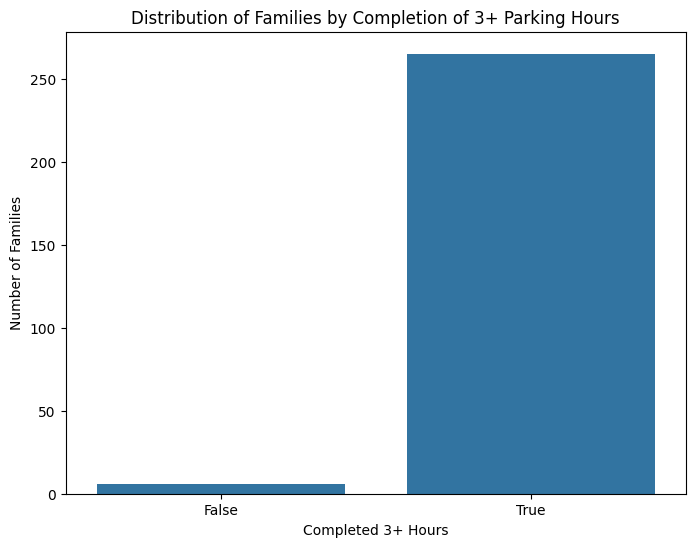

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Completed 3+ Hours', data=df_parking_hours)
plt.title('Distribution of Families by Completion of 3+ Parking Hours')
plt.xlabel('Completed 3+ Hours')
plt.ylabel('Number of Families')
plt.show()

## Summary:

### Data Analysis Key Findings

* A new column 'Completed 3+ Hours' was added to the dataframe, indicating whether a family completed 3 or more hours of parking.
* A countplot was generated to visualize the distribution of families based on whether they completed 3 or more hours of parking.

### Insights or Next Steps

* Analyze if there's a correlation between completing 3+ hours of parking and other factors like location or time of day.


# Task
List the families who have not completed their required 3 hours of parking volunteering and calculate the amount owing for each.

## Identify families who have not completed 3+ hours

### Subtask:
Filter the DataFrame to select only the families where 'Completed 3+ Hours' is False.


**Reasoning**:
Filter the dataframe to include only families who have not completed 3 or more hours.



In [14]:
df_owing_families = df_parking_hours[df_parking_hours['Completed 3+ Hours'] == False]
display(df_owing_families.head())

,Last Name,First Name,Child Last Name,Child First Name,Children,Email,Telephone,Upcoming Hours,Pending Hours,Finished Hours,Adhoc Hours,Total Hours,FundRaising Hours,Target Hours,Adjustment Hours,Adjust Notes,Completed 3+ Hours
31,Chen,Kelly 9997,Tang,Jasper,Jasper Tang (3),kchenyz@gmail.com,6048891178,0.0,0.0,1.0,0.0,1.0,0.0,8.0,0.0,new family joined apr1. 1 parking patrol day ...,False
91,Jia,Ting Ting 9998,Wong,Kyle,Kyle Wong (1),jiatingting1030@hotmail.com,604-218-3743,0.0,0.0,1.0,0.0,1.0,0.0,8.0,0.0,"new family 2025-03-31, 8h 3parking 1 FR",False
136,Li,Lisa Wai Sze 4685,Dai,Jacob,Jacob Dai (5),yuelei00@hotmail.com,778-680-0907,0.0,0.0,2.0,0.0,2.0,0.0,26.0,0.0,NaN,False
143,Lieu,Ken 8809,Lieu\nLieu,Sydney\nMya,Sydney Lieu; Mya Lieu (Graduate),kglieu@gmail.com,(778)668-8843,0.0,0.0,2.5,0.0,2.5,0.0,26.0,0.0,NaN,False
201,Song,Dan 8814,NaN,Ryan,Ryan (Graduate),dan-song@hotmail.com,(778) 588-2036,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,NaN,False


## Calculate amount owing

### Subtask:
For the families who have not completed their hours, calculate the amount owing based on the remaining hours.


**Reasoning**:
Calculate the remaining hours and the amount owing for each family in the filtered dataframe, then display the updated dataframe.



In [15]:
# Assume a cost per hour
COST_PER_HOUR = 20

# Calculate remaining hours
df_owing_families['Hours Owing'] = 3 - df_owing_families['Total Hours']

# Calculate the amount owing
df_owing_families['Amount Owing'] = df_owing_families['Hours Owing'] * COST_PER_HOUR

# Display the head of the updated DataFrame
display(df_owing_families[['Last Name', 'First Name', 'Total Hours', 'Hours Owing', 'Amount Owing']].head())

/tmp/ipython-input-3761123590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_owing_families['Hours Owing'] = 3 - df_owing_families['Total Hours']
/tmp/ipython-input-3761123590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_owing_families['Amount Owing'] = df_owing_families['Hours Owing'] * COST_PER_HOUR


,Last Name,First Name,Total Hours,Hours Owing,Amount Owing
31,Chen,Kelly 9997,1.0,2.0,40.0
91,Jia,Ting Ting 9998,1.0,2.0,40.0
136,Li,Lisa Wai Sze 4685,2.0,1.0,20.0
143,Lieu,Ken 8809,2.5,0.5,10.0
201,Song,Dan 8814,1.0,2.0,40.0


## List families and amount owing

### Subtask:
Display a list of families who have not completed their hours along with the calculated amount owing.


**Reasoning**:
Select and display the required columns from the DataFrame.



In [16]:
# Select the specified columns
df_owing_families_report = df_owing_families[['Last Name', 'First Name', 'Amount Owing']]

# Display the selected columns
display(df_owing_families_report)

,Last Name,First Name,Amount Owing
31,Chen,Kelly 9997,40.0
91,Jia,Ting Ting 9998,40.0
136,Li,Lisa Wai Sze 4685,20.0
143,Lieu,Ken 8809,10.0
201,Song,Dan 8814,40.0
243,Xian,Yanlin (Yannis) 8749,40.0


## Summary:

### Data Analysis Key Findings

*   Families who have not completed their required 3 hours of parking volunteering have been identified.
*   The amount owing for each of these families has been calculated based on a cost of \$20 per hour for the remaining hours.
*   A list of families owing money, including their first name, last name, and the calculated amount owing, has been generated.

### Insights or Next Steps

*   The generated list can be used for billing or follow-up with families who have not met the volunteering requirement.
*   Consider automating the process of identifying owing families and generating billing statements based on this analysis.
